In [1]:
%matplotlib inline

In [2]:
from protosound.data import FSD50KSpectro
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from itertools import islice

In [3]:
data_path = "../my-data"

In [4]:
dataset = FSD50KSpectro(data_path)
dataloader = DataLoader(dataset, shuffle=True)

In [5]:
n_samples = 15
samples = list(islice(iter(dataloader), n_samples))

In [6]:
spectros = [s[0] for s in samples]
classes = [dataset.reverse_class_encoding[s[1].item()] for s in samples]
files = [dataset.items[s[1].item()][0] for s in samples]

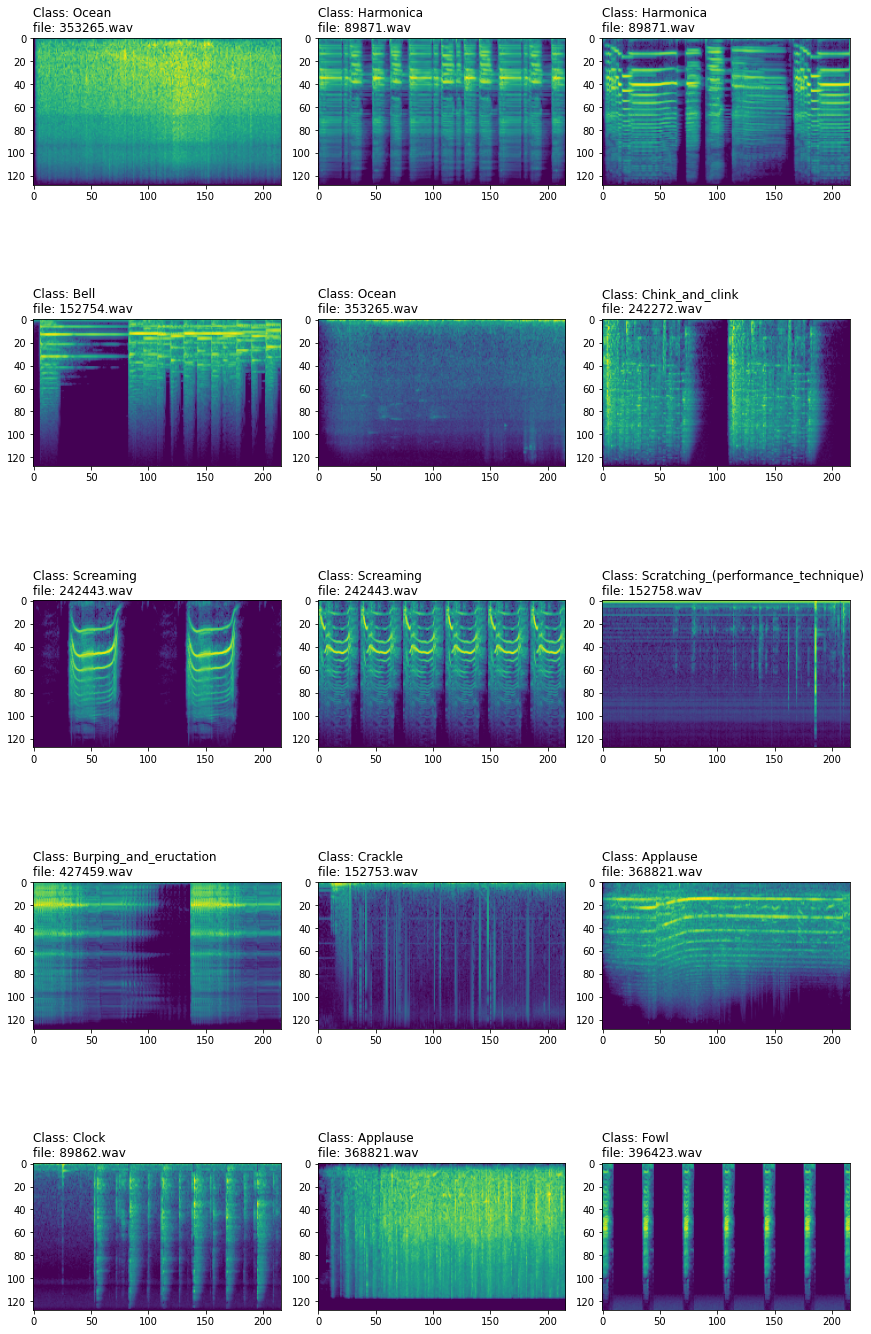

In [7]:
columns = 3
rows = 1 + ((n_samples-1) // columns)
scale = 4
fig = plt.figure(figsize=(scale*columns, scale*rows))
for i in range(n_samples):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(spectros[i][0].permute(1,2,0))
    plt.title("Class: "+classes[i]+"\nfile: "+files[i], loc='left')
plt.tight_layout()
plt.show()